# <font color=red>Team CS985MLDAGroup3 and 6 members. </font>

1. Safiullah Mehrabi  
    - RegID: 202289419 
2. Felix Achile Etu
    - RegID: 202260243
3. Prabha Mahendrakumar
    - RegID: 202272638
4. Divya shri Krishnasamy Rajagopal
    - RegID: 202262651
5. Wai Yin Chu
    - RegID: 202291674
6. Akshada Sanjay Dhadge
    - RegID: 202281887




    1.	Why did you choose the Decision tree method?
    2.	What was your expectation from DT?
    3.	Why did you choose the polynomial feature method?
    4.	How Bagging Regressor was a suitable approach in our result?
    5.	Why random forest?
    6.	what is the reason for choosing GradientBoostingregressor
    7.	why you chose SVR?
    8.	A description of the model and solution in the final set of predictions.
    9.	Brief explanation for why you choose this architecture and solution including: 
        a.	How you came up with the approach.
        b.	Why you selected or modified input variables, 
        c.	Explaining what worked and did not work, and what other models were tried.
    10.	How do you observe your result according to Kaggle’s submission or competition?
    11.	How do you observe the performance of the code on the Training data?



#  <font color=red> Adding Libraries for Regression Problem</font>

1. <font color=blue>Seaborn and matplotlib:</font> We used it for the visualisation and plotting of the data.
2. <font color=blue>StandardScaler:</font> it used for scalling of the data.
3. <font color=blue>LabelEncoder:</font> We are going to use this approach for the Encode of the object columns - train data and test data. The reason we chose to use <b>LabelEncoder</b> and not oneHotEncoder, the size of the new column will created is massive, label encoder is more suitable to turn object(string) into numerical for further analysis.

4. <font color=blue> PolynomialFeatures:</font> We used this to feed interactions between input features to our model. It also allows us to generate higher order versions of our input features.

3. <font color=blue>DecisionTreeRegressor:</font> The DecisionTreeRegressor is designed for building regression models using tree structures. A decision tree is incrementally developed as it breaks down a dataset into smaller and smaller subsets. A tree with decision nodes and leaf nodes is the final result.
4. <font color=blue>Bagging regressor:</font> An ensemble meta-estimator such as a bagging regressor aggregates the individual predictions (or the averaging method) of the base regressors using random subsets of the original dataset.
5. <font color=blue>RandomForestRegressor: </font> As a supervised learning algorithm, RandomForestRegressor is a type of regression or classification problem solver that uses ensemble methods (bagging). The algorithm was used for regression prediction as it constructs a multitude of decision trees during the training process and outputs the mean/mode of prediction for each tree.
6. <font color=blue>GradientBoostingRegressor:</font> It is possible to use the GradientBoostingRegressor algorithm both as a regressor and as a classifier to predict continuous and categorical targets. Mean Square Error (MSE) is the cost function when it is used as a regressor, and log loss is the cost function when it is used as a classifier.
7. <font color=blue>SVR:</font> In Support Vector Regression, discrete values are predicted using supervised learning. The idea behind Support Vector Regression is to find the most appropriate fit line. It is a supervised learning algorithm similar to SVMs. According to SVR, the best-fit line is the hyperplane with the greatest number of points.


#  <font color=red> Description of the solution:</font>
We have tried 5 approaches as solution for this problem:
- DecisionTreeRegressor
- Bagging Regressor
- RandomForestRegressor
- GradientBoostingRegressor
- SVR(Support Vector Regression)

Therefore, this dataset includes inbalance data so random forest is very effective on a wide range of problem. 
Unfortunately, the Random Forest is unable to generalize the linear trend to new examples having a different time value from the training samples.
The decision tree algorithm is effective for balanced classification, although it does not perform well on imbalanced datasets.


# <font color=red> Summary: </font>

we should write about summary of the notebook.

We have tried Decision Tree (we learn from last semester), poly SVR (week 3), Bagging with Random Forest(week 4),
Gradient Boosting Regressor(also week4),
judging from the result : bagging from RF is the more suitable one.
#### We have used several approaches but the best model that I found is the SVR that gave me the best score and accuracy.


In [8]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,LabelEncoder,PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,GradientBoostingRegressor 
from sklearn.svm import SVR

pd.set_option('display.max_rows', 1300)
pd.set_option('display.max_columns', 1300)
pd.set_option('display.width', 1300)

In [11]:
#Check version of the Sklearn:
import sklearn
print(sklearn.__version__)

1.0.2


# <font color=red> Prepare Data</font>

In [ ]:

# loop thr
trainData = pd.read_csv('CS98XRegressionTrain.csv')
trainData = pd.DataFrame(trainData)


testData = pd.read_csv('CS98XRegressionTest.csv')
testData = pd.DataFrame(testData)

#print(wholeList)

In [3]:
# check shape of the data
print('train data shape:',trainData.shape)
print('test data shape:',testData.shape)


train data shape: (453, 15)
test data shape: (114, 14)


In [4]:
# check the info of the data
print('train data info:',trainData.info())
print('test data info:',testData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB
train data info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------   

# <font color=red>Check For Redundancy</font>

In [5]:
# check if duplicate row exist in test data and train data

print('train data duplicated:',trainData.duplicated().any())
print('test data duplicated:',testData.duplicated().any())

train data duplicated: False
test data duplicated: False


In [6]:
# check if any NaN cell in both train and test data
print('train data NaN:',trainData.columns[trainData.isnull().any()])
print('test data NaN:',testData.columns[testData.isnull().any()])


train data NaN: Index(['top genre'], dtype='object')
test data NaN: Index(['top genre'], dtype='object')


# <font color=red> Take care of missing values</font>


In [7]:
# filter out the NaN rows - in train data only, even there are empty in test data, it will be ingore as this is not related to the training
# 1) run drop if empty found
# 2) create a new dataframe that for future use
if not(trainData.columns[trainData.isnull().any()].isnull()):
    trainDataClean = trainData.drop(trainData[trainData['top genre'].isnull()].index)
testDataClean = testData.copy()


In [8]:
# encode the object columns - train data and test data,
# reason: using label encoder and not oneHotEncoder, the size of the new column will created is massive, label encoder is more suitable to turn object(string) to numerical for further analysis
encoder = LabelEncoder()
encodeCols = ["title","artist","top genre"]
for col in encodeCols:
    encoder.fit(trainDataClean[col])
    trainDataClean[col] = encoder.transform(trainDataClean[col])
    
for col in encodeCols:
    encoder.fit(testDataClean[col])
    testDataClean[col] = encoder.transform(testDataClean[col])

In [9]:
# 
print (trainDataClean.describe())


               Id       title      artist   top genre         year         bpm        nrgy        dnce          dB        live         val         dur       acous        spch         pop
count  438.000000  438.000000  438.000000  438.000000   438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000
mean   227.600457  218.038813  162.383562   32.547945  1990.881279  118.326484   60.504566   59.780822   -8.787671   17.605023   59.625571  228.267123   32.191781    5.671233   61.557078
std    130.463047  125.990359   95.913047   26.075252    16.697047   25.175735   22.089660   15.404757    3.591005   13.807492   24.480160   63.426812   29.279912    5.571392   12.759353
min      1.000000    0.000000    0.000000    0.000000  1948.000000   62.000000    7.000000   18.000000  -24.000000    2.000000    6.000000   98.000000    0.000000    2.000000   26.000000
25%    116.250000  109.250000   79.250000    4.000000  1976.00000

In [10]:
# a brief review of encoded and remove empty cell dataframe in train data 
print("train data - after encode:\n",trainDataClean.head())

train data - after encode:
    Id  title  artist  top genre  year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop
0   1    265      54          1  1996  107    31    45  -8    13   28  150     75     3   44
2   3    160      19          1  1979  105    36    63  -9    13   67  245     11     3   77
3   4    422      18          1  1980  170    28    47 -16    13   33  232     25     3   67
4   5    138      92         68  1973  121    47    56  -8    15   40  193     45     3   63
5   6    139      40         80  2010  110    56    71  -7    12   23  223     15     6   74


# <font color=red>Let's take a Look at our data graphically:</font>

The point of this competition is to predict if an individual will popular in songs based on the features in the whole dataset:
Let’s see if we can gain a better understanding of the popularity of the songs.

Text(0.5, 1.0, 'Corelation of all columns')

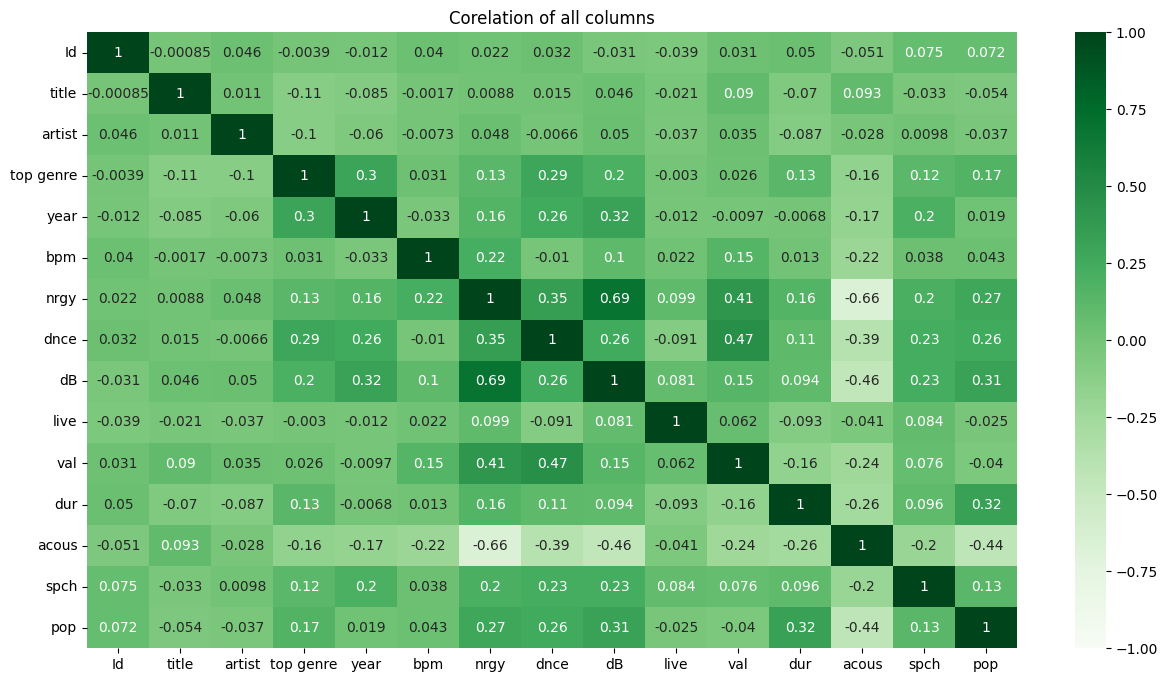

In [11]:
# corelation before remove outliner - train data
corelation = trainDataClean.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(trainDataClean.corr(), center=0, cmap='Greens',vmin=-1, vmax=1, annot=True)
ax.set_title('Corelation of all columns')

In [12]:
# filter the outliner of each columns in train data 
th = 5
outlinerList={}
outlinerCols = trainDataClean.columns
for col in outlinerCols:
    mean = np.mean(trainDataClean[col])
    std=np.std(trainDataClean[col])
    out_list=[]
    for i in trainDataClean[col]:
        z=(i-mean)/std
        if z > th:
            out_list.append(i)
    if (out_list):
        outlinerList[col]= out_list
print("outliers : ", outlinerList)

outliers :  {'live': [93], 'spch': [38, 37, 36, 47]}


In [13]:
# Extract outliner in the dataframe and present the shape of dataframe before and after extraction

print("before remove outliner:",trainDataClean.shape)
for key,value in outlinerList.items():
    print(key,value)
    for i in value:
        trainDataClean.drop(trainDataClean[trainDataClean[key]==i].index, inplace = True)

print("after remove outliner:",trainDataClean.shape)

before remove outliner: (438, 15)
live [93]
spch [38, 37, 36, 47]
after remove outliner: (433, 15)


Text(0.5, 1.0, 'Corelation of all columns')

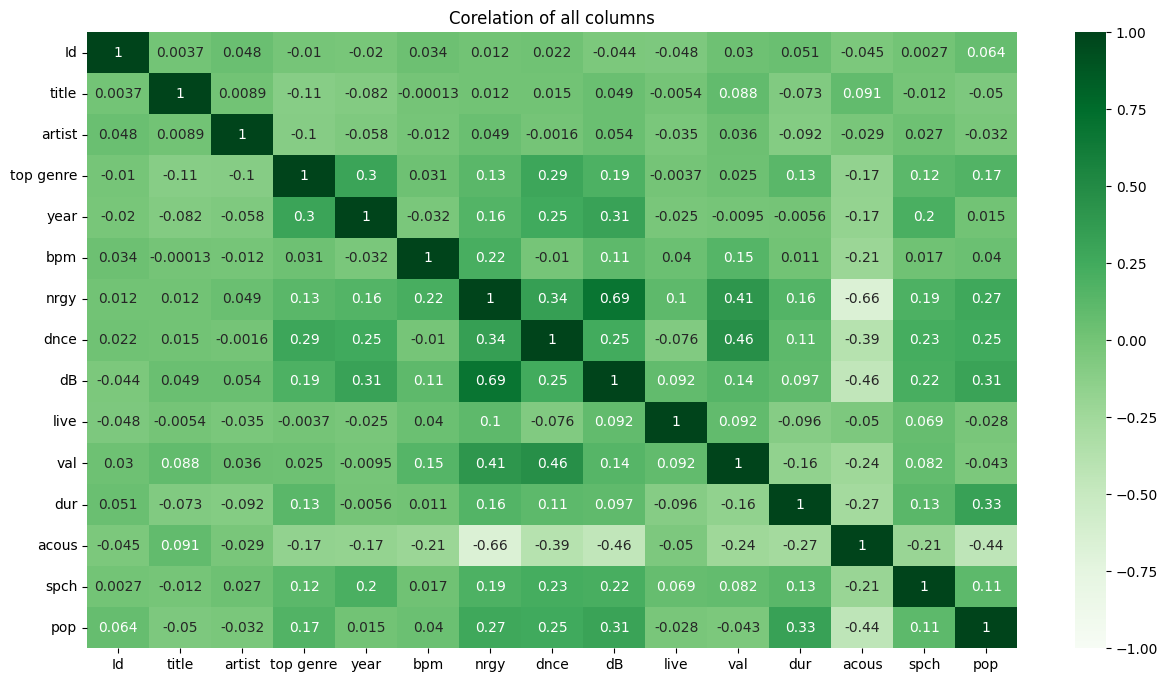

In [14]:
# corelation before remove outliner
corelation = trainDataClean.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(trainDataClean.corr(), center=0, cmap='Greens',vmin=-1, vmax=1, annot=True)
ax.set_title('Corelation of all columns')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


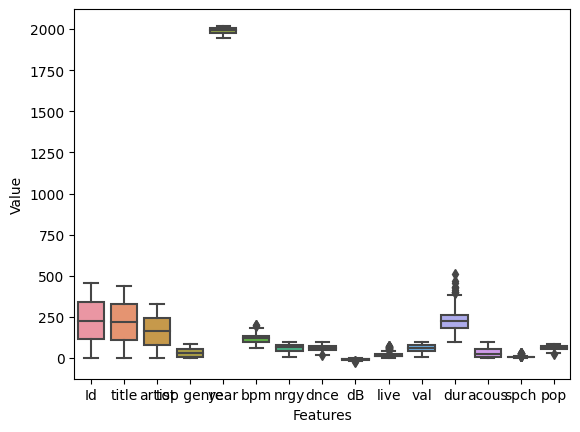

In [15]:
sns.boxplot(data=trainDataClean)
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

# <font color=red>Correlation Result:</font> 

After the extraction of outliner and empty cell, from the corelation matrix, we can find that there are a number of columns that have a correlation<b> over 0.1</b>, list as following, "top genre","nrgy","dnce","spch","dB","dur","year"
form the pair grid, we can find there is a trend between "nrgy, db and dnce" and "dur, top genre and pop".

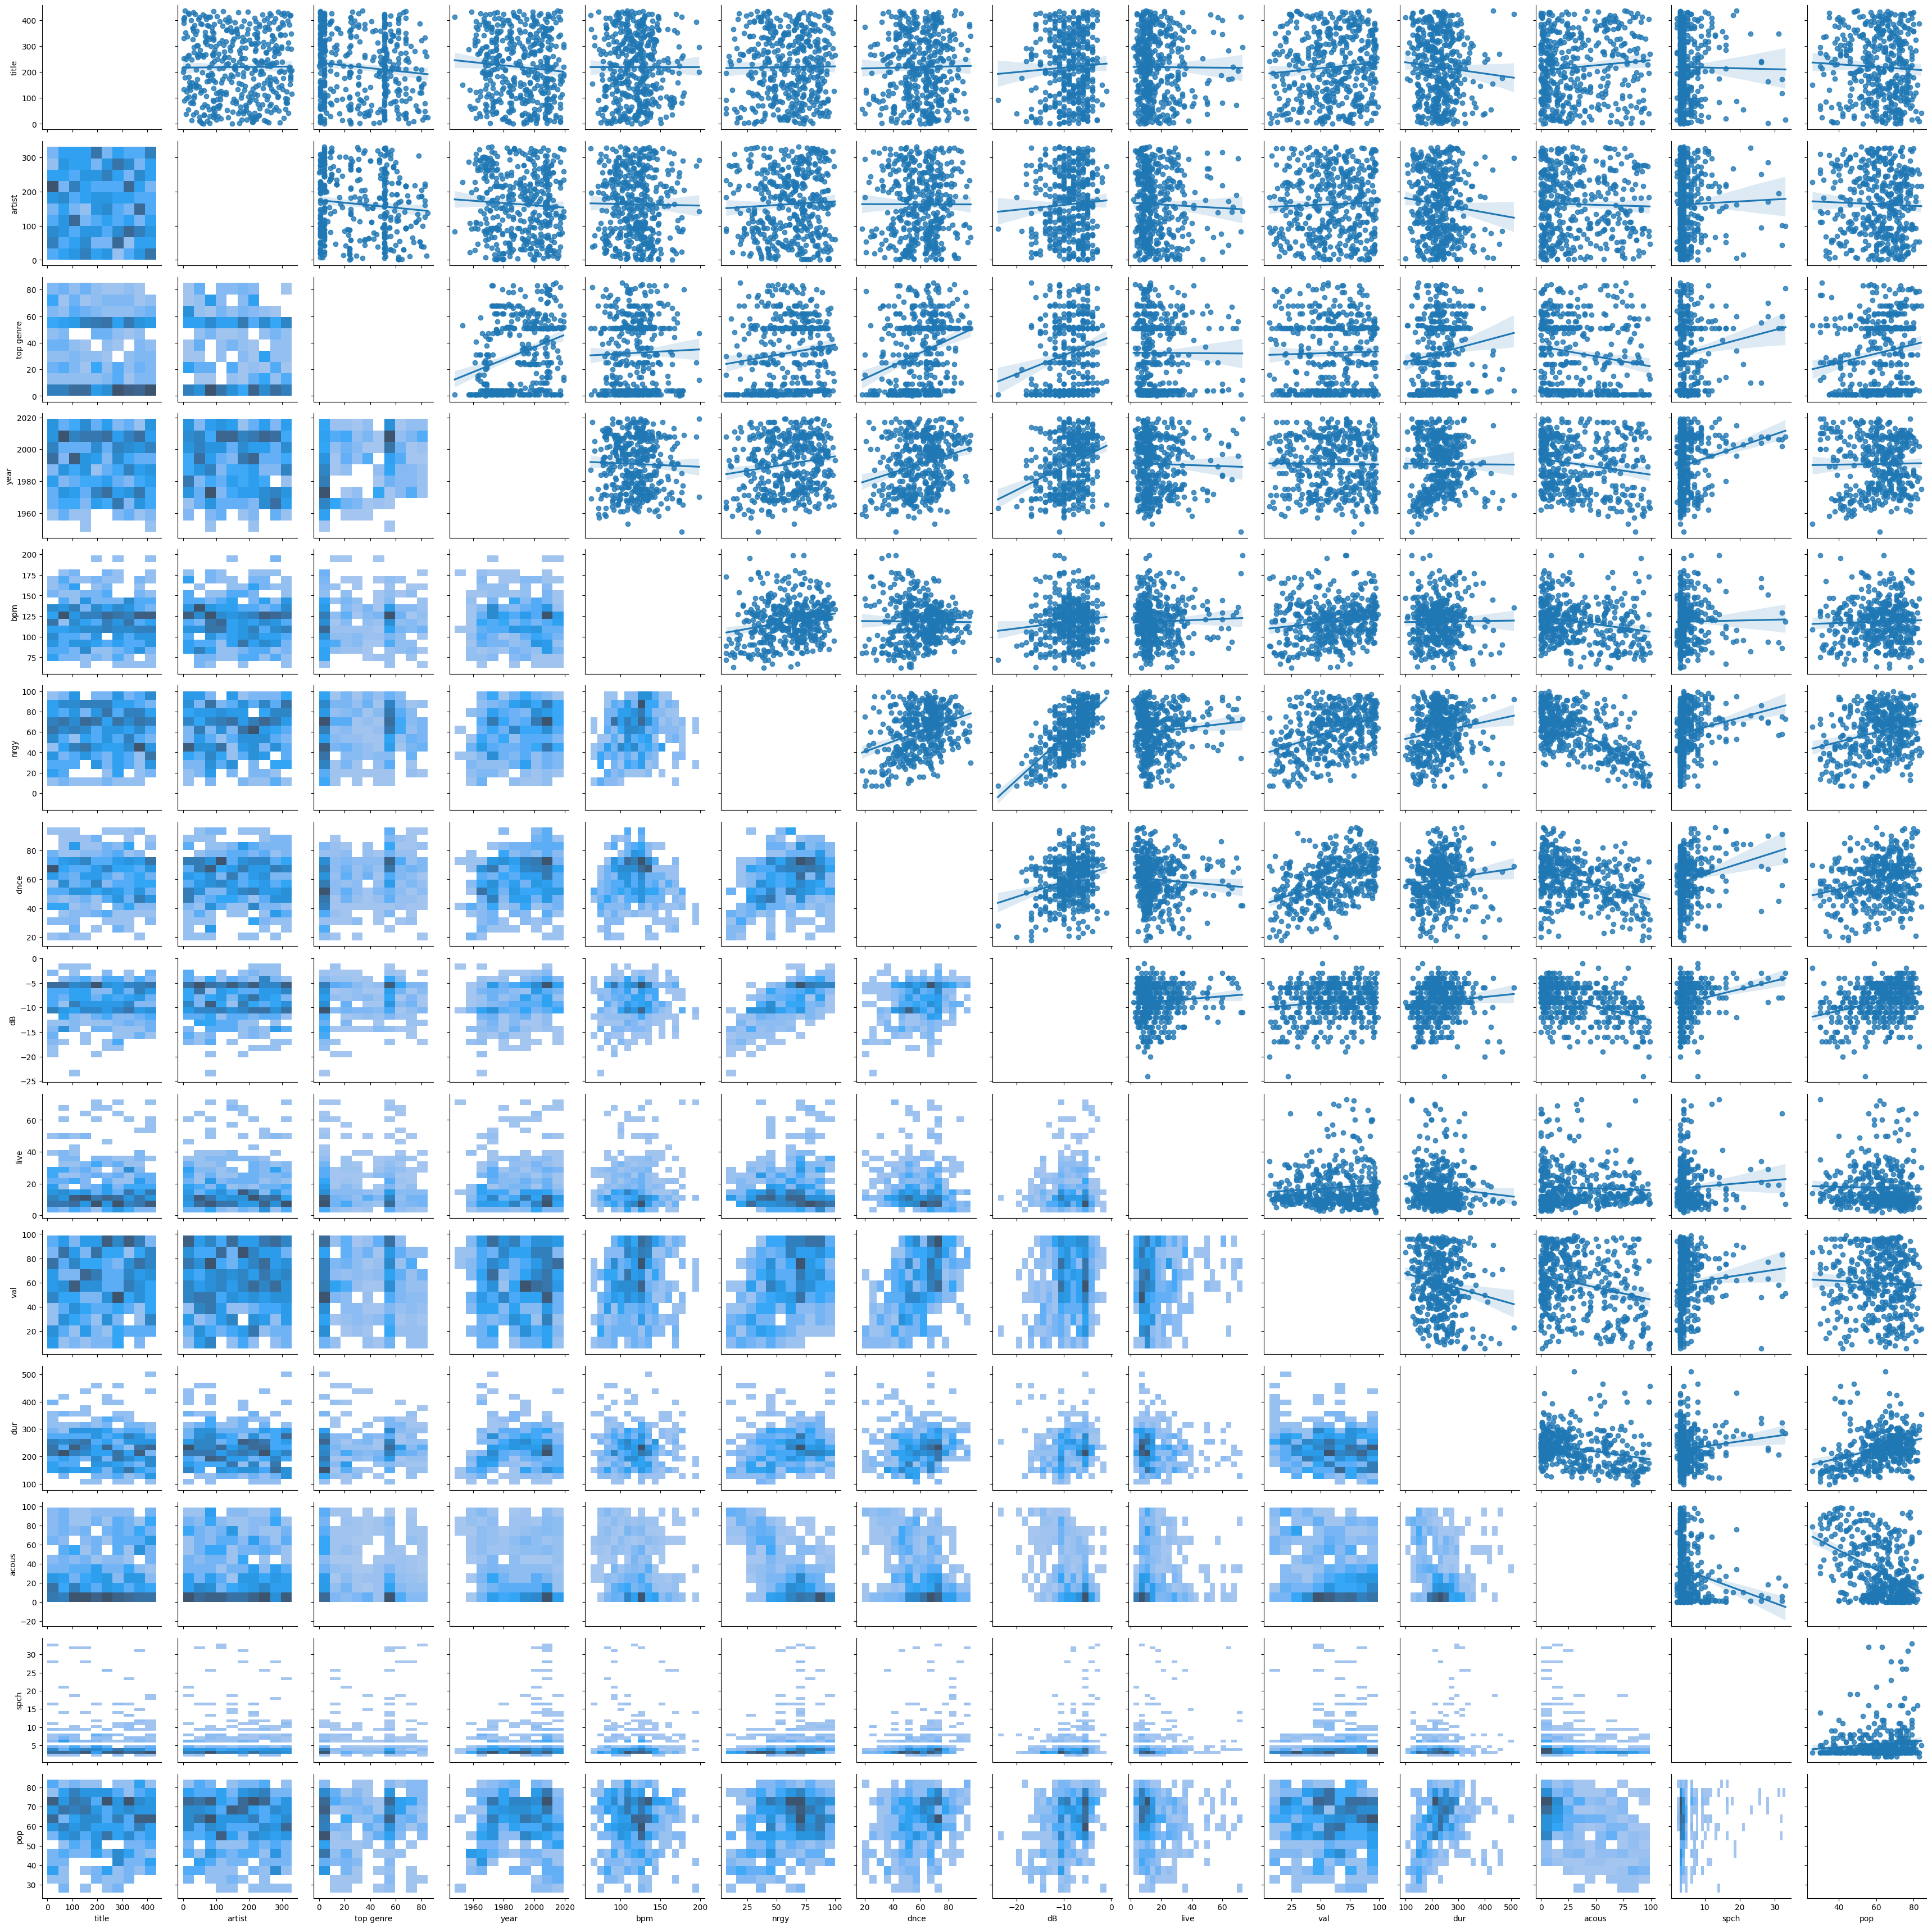

In [16]:
g = sns.PairGrid(trainDataClean.drop(columns=["Id"]))

g.map_upper(sns.regplot)
g.map_lower(sns.histplot)

# <font color=red>Split Into Train/Test:</font>
 
 ##### <font color=blue>Once again, why it matters to us:</font>


In [18]:
# seperated list - train data

print('train data info:',trainDataClean.info())
print('test data info:',testData.info())

# seperate x and y
y = trainDataClean["pop"]
x = trainDataClean[["top genre","nrgy","dnce","spch","dB","dur","year"]]
# scale the data before using 
stdScaler = StandardScaler()
xScaled = stdScaler.fit_transform(x)

# for polynomial 
polyFeat = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeat.fit_transform(x)
xPolyScaled = stdScaler.fit_transform(xPoly)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 433 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id         433 non-null    int64
 1   title      433 non-null    int64
 2   artist     433 non-null    int64
 3   top genre  433 non-null    int64
 4   year       433 non-null    int64
 5   bpm        433 non-null    int64
 6   nrgy       433 non-null    int64
 7   dnce       433 non-null    int64
 8   dB         433 non-null    int64
 9   live       433 non-null    int64
 10  val        433 non-null    int64
 11  dur        433 non-null    int64
 12  acous      433 non-null    int64
 13  spch       433 non-null    int64
 14  pop        433 non-null    int64
dtypes: int64(15)
memory usage: 54.1 KB
train data info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0  

# <font color=red> Polynomial Features:</font>
##### <font color=blue>Once again, why it matters to us:</font>

We opted for the Polynomial Feature method because it fits a nonlinear relationship between the value of "X" and the correlating mean of "Y". Basically, the Polynomial Feature method is used to explain or define nonlinear. 


In [19]:
# seperate list - test data
#xTest = testDataClean.drop(columns=["top genre","Id","artist","title","year"])
yTest = testDataClean["Id"]
xTest = testDataClean[["top genre","nrgy","dnce","spch","dB","dur","year"]]

stdScaler = StandardScaler()
xScaledTest = stdScaler.fit_transform(xTest)

polyFeat = PolynomialFeatures(degree=2, include_bias=False)
xPolyScaledTest = polyFeat.fit_transform(xTest)
xPolyScaledTest = stdScaler.fit_transform(xPolyScaledTest)

Some function is developed for the readability, configurability for both generate csv for Kaggle and simpified the score/model fitting

In [ ]:
# function to write the Id and classification result to a CSV file
def toCsvFile(yPred, Id,axis,fileName):
    predTestdf = pd.DataFrame(yPred)
    result = pd.concat([Id, predTestdf], axis=1, ignore_index=True)
    result = result.set_axis(axis, axis=1)
    result.to_csv(fileName,index=False)
    print("Exported to ",fileName)

# <font color=red> Decision Tree: </font>

##### <font color=blue>Once again, why it matters to us:</font>
The Decision Tree involves describing what the input is and what the corresponding output is in the training data.
The rationale behind choosing this algorithm is based on the basic knowledge of the algorithm we garnered in the previous semester which seemed like a proper starting point the due ability to work with both linear and non-linear data. However, we moved on from the <b> decision tree method because it didn't meet the expected performance on our data</b>. 


In [20]:
# 1)Decision Tree Regression
# scaled x is not applied for this sample as decision tree do not require scaling
tree = DecisionTreeRegressor(min_samples_leaf=5) 
tree.fit(x,y)
predTreeTest = tree.predict(xTest) 
print(predTreeTest)
predTestdf = pd.DataFrame(predTreeTest)
result = pd.concat([yTest, predTestdf], axis=1, ignore_index=True)
result = result.set_axis(['Id','pop'], axis=1)
print(result.columns)
result.to_csv("my_data_tree_Grp3.csv",index=False,header="Id,pop")

[75.125      64.25       55.88888889 63.         52.2        58.28571429
 58.4        41.         63.5        69.4        55.88888889 75.55555556
 55.88888889 55.88888889 72.83333333 50.         62.42857143 63.375
 60.4        60.4        51.77777778 62.42857143 59.4        46.
 55.         66.2        63.         47.         52.2        71.
 75.55555556 53.88888889 71.         71.4        70.8        75.125
 67.         58.4        63.375      74.42857143 69.66666667 60.71428571
 62.         59.4        58.4        55.88888889 63.375      58.
 71.25       71.25       52.2        60.71428571 69.66666667 46.
 64.25       72.         60.71428571 40.6        72.5        41.
 74.42857143 71.66666667 71.25       66.2        75.125      66.66666667
 60.71428571 55.88888889 58.28571429 43.         75.125      55.16666667
 55.         67.         55.88888889 74.42857143 75.125      75.55555556
 71.25       71.         69.4        63.375      40.6        74.42857143
 40.6        47.         60.

# <font color=red>Support Vector Regressor (SVR):</font>






In classification problems, Support Vector Machines (SVMs) are well-known; however, they are less well-known in regression problems. These types of models are called Support Vector Regressions (SVRs).
With SVR, we can choose how to tolerate errors, both by defining an acceptable margin for error and by tuning our tolerance for falling outside that margin. You should feel confident enough to include SVR in your modelling arsenal now that you've seen the ins and outs of it in this tutorial.

##### <font color=blue>Once again, why it matters to us:</font>


In [21]:
# 2) poly SVR
# instead of scaled x , we use scaled polynomial featured x (degree=2)as we are going to apply poly SVR(degree=2))
svrPoly = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svrPoly.fit(xPolyScaled,y)
predSVRPolyTest = svrPoly.predict(xPolyScaledTest) 
print(predSVRPolyTest)
predTestdf = pd.DataFrame(predSVRPolyTest)
result = pd.concat([yTest, predTestdf], axis=1, ignore_index=True)
result = result.set_axis(['Id','pop'], axis=1)
print(result.columns)
result.to_csv("my_data_SVR_Grp3.csv",index=False,header="Id,pop")

[ 79.91210046  65.08818353  64.89974626  55.7767397   40.88587346
  68.98524121  63.13472261  53.30053838  61.45007527  68.25694269
  47.53888401  70.74314042  59.83720526  63.19106629  67.78527703
  62.19422011  58.91727095  66.46221692  77.04202893  63.94880283
  66.62237533  55.39539124  54.32480435  45.24037273  53.24784552
  67.85063486  61.78173968  61.75680685  47.06431478  82.37371557
  71.04693425  49.43153172  70.85913561  66.269382    68.25815505
  84.03667298  72.39497717  60.97820794  60.16727133  67.35652872
  70.58541335  60.01727712  63.56141545  49.51102886  64.13566943
  62.09776942  77.30671137  68.0268388   64.95350764  65.5085624
  49.46886562  75.88944354  73.92028999  34.40491137  66.99288361
  61.34864674  69.38722959  52.93452264  73.29496135  51.85024816
  66.62483161  75.21872502  62.87748807  63.78505035  79.16752755
  62.46306865  71.48801228  59.48456682  68.32156039  69.9338495
  67.77785576  51.38052474  61.14633578  70.59862003  64.74394887
  74.6458949

# <font color=red> Bagging Regressor</font>

##### <font color=blue>Once again, why it matters to us:</font>


In [22]:
# 3) bagging with polySVR
baggedPolySVRReg = BaggingRegressor(base_estimator=SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale"),n_estimators=10, random_state=0,bootstrap=True, n_jobs=-1)
baggedPolySVRReg.fit(xPolyScaled,y)
predbaggedSVRPolyTest = baggedPolySVRReg.predict(xPolyScaledTest)     
print(predbaggedSVRPolyTest)
predTestdf = pd.DataFrame(predbaggedSVRPolyTest)
result = pd.concat([yTest, predTestdf], axis=1, ignore_index=True)
result = result.set_axis(['Id','pop'], axis=1)
print(result.columns)
result.to_csv("my_data_Bagged_SVR_Grp3.csv",index=False,header="Id,pop")

[77.73156861 66.83032189 62.59515771 55.64274797 41.43254837 69.01239536
 62.23725185 51.82519859 59.33932584 66.3230955  48.72685949 67.91324146
 58.2909167  62.84688996 69.02173566 60.05359634 56.84704209 66.70818804
 78.03833766 66.07757693 64.41761806 53.66628974 53.29685729 46.62363756
 42.16929063 67.96116901 62.60743888 62.01814788 49.30253224 83.22093131
 74.81188713 48.02434227 67.8137907  67.36684602 67.2340411  82.80806959
 70.60088508 61.04625696 61.04482034 66.24062237 71.15375296 59.13156737
 64.16443173 50.78408598 64.40823966 63.19106803 73.41283298 66.92632326
 63.92548939 66.75408148 51.47735897 77.38330018 74.22169997 39.35014478
 69.47114789 62.78183644 67.43242559 51.08661947 73.91557341 49.83626493
 65.39692801 74.41251292 64.21363754 64.88718272 79.4495485  57.09615139
 83.90807036 59.128281   67.15983781 70.1264847  69.88699512 48.11817228
 60.29916026 71.19306559 65.16802207 72.47482869 72.76090814 79.33062761
 69.52908414 59.60856943 66.81445057 78.58847596 56

# <font color=red> Random Forest</font>

##### Wikipedia Definition:
    
   _Random forests are an ensemble learning method for classification (and regression)_   
   _that operate by constructing a multitude decision trees at training time and outputting_ <br>
   _the class that is the mode of the classes output by individual trees._
    
    
##### <font color=blue>Once again, why it matters to us:</blue>
Here’s an alternative: the Random Forest. We use this technique to tease out the structure from the data, using raw computing power and clever statistical observations rather than the equations we created above.
Our random forest algorithm generates a random number of very simple models based on our data variance observations. Those models are like our gumball guesses, but when they are averaged, they can be powerful prediction tools. The averaging step is the key. Despite the fact that most of those models were awful, they were all almost as bad as each other. It is therefore impossible for the bad ones to affect our model when they are averaged together. However, if anything is left to be said, one or a few of those models have discovered how the data really works. Here's how you instantiate and fit a random forest, generate predictions, and score the results.

##### <font color=green>Judging from the result : Bagging from RF is the more suitable one.</font>

In [23]:
# 4) bagging with randomForest
# Create the random forest model and fit the model to our training data

baggedRFReg = BaggingRegressor(base_estimator=RandomForestRegressor(max_leaf_nodes=50, n_jobs=-1),n_estimators=15, random_state=0,bootstrap=True, n_jobs=-1)
baggedRFReg.fit(xPolyScaled,y)
predbaggedRFTest = baggedRFReg.predict(xPolyScaledTest)     
print(predbaggedRFTest)

predTestdf = pd.DataFrame(predbaggedRFTest)
result = pd.concat([yTest, predTestdf], axis=1, ignore_index=True)
result = result.set_axis(['Id','pop'], axis=1)
print(result.columns)
result.to_csv("my_data_bagged_RF_Grp3.csv",index=False,header="Id,pop")

[70.03034542 61.81146763 56.30589038 61.83249812 46.27493795 65.05063498
 59.32887381 44.48036414 62.7904077  64.63924688 54.96161397 68.59957003
 56.47268783 60.64302185 68.84324489 60.46284323 56.98317948 64.2828555
 68.83922832 67.45636427 58.07151026 55.48225518 48.64766668 51.59183338
 55.1343082  63.77175611 61.16909772 56.73811661 47.70022519 70.13789355
 68.92846781 53.48731001 64.75621538 70.65766958 65.45512006 72.43678795
 70.0029512  58.12437314 62.1893541  67.54356462 68.65958585 61.52339998
 61.76396565 44.88037096 59.14361405 59.85729585 66.42616681 61.70979348
 62.63159718 62.85660988 52.45075049 66.76292415 68.84562454 50.63619543
 61.95671936 60.42293102 63.8890877  51.23849778 71.12852019 46.73265153
 63.12936978 66.9686896  64.31767531 64.34715936 71.07133627 60.98981682
 63.75744529 55.36037461 68.03496645 57.49868247 68.40396631 49.8446313
 56.08851779 67.2385967  57.82906602 68.68903357 69.26716295 66.65499675
 60.45725262 56.76699172 65.48380322 62.72602243 47.8

In [24]:
# check the importance of each feature
rf = RandomForestRegressor(max_leaf_nodes=50, n_jobs=-1)
rf.fit(xScaled,y)
rf.feature_importances_

array([0.08305163, 0.12517354, 0.07363026, 0.0526412 , 0.08522039,
       0.41438498, 0.16589801])

# <font color=red> Gradient Boosting Regressor</font>

##### <font color=blue>Once again, why it matters to us:</font>


In [25]:
# 5) Gradient Boosting Regressor
gradBoostReg = GradientBoostingRegressor(random_state=0)
gradBoostReg.fit(xScaled,y)
predGradBoostReg = gradBoostReg.predict(xScaledTest)     
print(predGradBoostReg)

predTestdf = pd.DataFrame(predGradBoostReg)
result = pd.concat([yTest, predTestdf], axis=1, ignore_index=True)
result = result.set_axis(['Id','pop'], axis=1)
print(result.columns)
result.to_csv("my_data_grad_boost_Grp3.csv",index=False,header="Id,pop")

[71.68737275 68.78074191 64.39507172 62.4920472  41.52115805 67.40487054
 63.76460828 42.2329036  59.60564103 65.21753456 55.34143471 66.96141942
 64.77151739 62.20770732 68.15866517 57.33390557 64.16874149 63.93429437
 70.30600234 67.44381133 51.5990023  56.79654594 52.2238418  49.45787167
 54.80164918 67.59247333 61.46009097 48.82147658 41.08059874 69.60728621
 68.23127882 54.23718157 65.24780036 69.34117797 66.01789355 76.60455939
 68.62910554 62.90052673 61.6945915  73.47555856 68.40156906 59.35990533
 65.14603607 43.49157223 64.9226038  59.66429206 70.6795074  62.44813149
 65.50984894 66.20876907 47.08937935 70.90720601 69.61989194 51.04210175
 67.65290526 62.009264   65.05501524 51.03517654 69.80981668 49.47549095
 62.19541964 69.69556223 67.06769829 65.34736105 70.58707192 65.19068327
 59.42825628 66.5685967  68.23072017 48.29642612 69.15941527 49.0223983
 53.91131194 65.142266   58.86106522 68.82633769 72.87313442 68.06864579
 64.28736711 59.71802508 66.83302251 69.39180966 52.